# 04 · Results and Plots

Aggregate metrics and generate figures for latency, throughput, accuracy, and energy.

- How to read the figures: [results](../docs/results.md)
- Energy measurement caveats: [energy](../docs/energy.md)
- Documentation index: [README](../docs/README.md)

In [10]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yaml

root = Path(__file__).resolve().parent.parent if '__file__' in globals() else Path(os.getcwd()).parent
cfg = yaml.safe_load(open(root / 'config/bench_matrix.yaml', 'r', encoding='utf-8'))
figs = root / cfg['outputs']['figures_dir'];
tables = root / cfg['outputs']['tables_dir']
figs.mkdir(parents=True, exist_ok=True);
tables.mkdir(parents=True, exist_ok=True)
# Load CSVs
train_csv = root / cfg['outputs']['train_csv']
infer_csv = root / cfg['outputs']['infer_csv']
df_train = pd.read_csv(train_csv) if train_csv.exists() else pd.DataFrame()
df_infer = pd.read_csv(infer_csv) if infer_csv.exists() else pd.DataFrame()
display(df_train.head())
display(df_infer.head())

,ts,exp_id,model,dataset,precision,engine,provider,batch,warmup,runs,...,torch_ver,ort_ver,ov_ver,driver_ver,model_hash,consistency_ok,max_abs_diff_torch_ort,max_abs_diff_torch_ov,top1_agree_torch_ort,top1_agree_torch_ov
0,2025-08-13T09:01:50.229533+00:00,train-baseline,cnn,cifar10,fp32,pytorch,CPU,64,10,100,...,NaN,NaN,NaN,NaN,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN
1,2025-08-13T09:02:01.859424+00:00,train-baseline,cnn,cifar10,fp32,pytorch,CUDA,64,10,100,...,NaN,NaN,NaN,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN
2,2025-08-13T09:06:06.567412+00:00,train-baseline,mlp,cifar10,fp32,pytorch,CPU,64,10,100,...,NaN,NaN,NaN,NaN,8ce0a2d8d3eb8bb63c0cbea362569a43cafabce0d01e62...,NaN,NaN,NaN,NaN,NaN
3,2025-08-13T09:06:18.052020+00:00,train-baseline,mlp,cifar10,fp32,pytorch,CUDA,64,10,100,...,NaN,NaN,NaN,580.97,8ce0a2d8d3eb8bb63c0cbea362569a43cafabce0d01e62...,NaN,NaN,NaN,NaN,NaN
4,2025-08-13T09:14:36.067952+00:00,train-baseline,mobilenetv3,cifar10,fp32,pytorch,CPU,64,10,100,...,NaN,NaN,NaN,NaN,77111869979b4227723fdbdefa354c009c843951df944c...,NaN,NaN,NaN,NaN,NaN


,ts,exp_id,model,dataset,precision,engine,provider,batch,warmup,runs,...,torch_ver,ort_ver,ov_ver,driver_ver,model_hash,consistency_ok,max_abs_diff_torch_ort,max_abs_diff_torch_ov,top1_agree_torch_ort,top1_agree_torch_ov
0,2025-08-13T18:40:43.964239+00:00,engines-bench,cnn,cifar10,fp32,pytorch,CPU,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,True,0.000006,0.000009,True,True
1,2025-08-13T18:40:51.836652+00:00,engines-bench,cnn,cifar10,fp32,pytorch,CUDA,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,False,0.000006,0.027887,True,True
2,2025-08-13T18:40:58.168488+00:00,engines-bench,cnn,cifar10,fp32,onnxruntime,CPU,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN
3,2025-08-13T18:41:04.961802+00:00,engines-bench,cnn,cifar10,fp32,onnxruntime,CUDA,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN
4,2025-08-13T18:41:12.200479+00:00,engines-bench,cnn,cifar10,fp32,openvino,CPU,64,10,100,...,2.8.0+cu129,1.22.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,580.97,2e5a827f64e0846facbf372d8afb7ac69fa02d42040f3d...,NaN,NaN,NaN,NaN,NaN


## Summary tables

[NOTE] If any of the following tables looks empty, please run notebooks 01 and 02 first, then re-run this one.

In [11]:
# Best accuracy per model/engine/provider
if not df_infer.empty:
    g = (df_infer
         .groupby(['model', 'engine', 'provider'])
         .agg(acc=('acc', 'max'), lat_ms_mean=('lat_ms_mean', 'mean'), thr_ips=('thr_ips', 'mean'),
              energy_j=('energy_j', 'first')))
    display(g)
    g.reset_index().to_csv(tables / 'summary.csv', index=False)
else:
    print('No inference CSV found.')

acc  lat_ms_mean        thr_ips  \
model             engine      provider                                         
cnn               onnxruntime CPU       0.828125     2.637835   24262.321187   
                              CUDA      0.828125     0.628961  101755.116736   
                  openvino    CPU       0.828125     4.045943   15818.314791   
                              GPU       0.828125     1.020839   62693.529528   
                              NPU       0.828125     0.381906    2618.442484   
                  pytorch     CPU       0.828125     9.873397    6482.064886   
                              CUDA      0.828125     0.766967   83445.571996   
efficientnetlite0 onnxruntime CPU       0.859375    24.536618    2608.346431   
                              CUDA      0.859375     4.791041   13358.265980   
                  openvino    CPU       0.859375    35.157759    1820.366309   
                              GPU       0.859375    14.036971    4559.388204   
                              NPU       0.859375     1.786936     559.617245   
                  pytorch     CPU       0.859375    82.331686     777.343488   
                              CUDA      0.859375    10.695354    5983.906657   
mlp               onnxruntime CPU       0.546875     0.820321   78018.239188   
                              CUDA      0.546875     0.462892  138261.192709   
                  openvino    CPU       0.546875     0.570808  112121.764219   
                              GPU       0.546875     0.787393   81280.885131   
                              NPU       0.546875     0.423376    2361.968847   
                  pytorch     CPU       0.546875     0.924938   69193.827057   
                              CUDA      0.546875     0.495186  129244.364694   
mobilenetv3       onnxruntime CPU       0.781250     5.942589   10769.716701   
                              CUDA      0.781250     2.525639   25340.121850   
                  openvino    CPU       0.781250     7.717753    8292.569094   
                              GPU       0.781250     3.734629   17136.909718   
                              NPU       0.781250     0.807827    1237.888207   
                  pytorch     CPU       0.781250    30.316399    2111.068666   
                              CUDA      0.781250     6.926466    9239.921195   

                                                  energy_j  
model             engine      provider                      
cnn               onnxruntime CPU                      N/D  
                              CUDA      14.209999999991851  
                  openvino    CPU                      N/D  
                              GPU                      N/D  
                              NPU                      N/D  
                  pytorch     CPU                      N/D  
                              CUDA      17.270999999978812  
efficientnetlite0 onnxruntime CPU                      N/D  
                              CUDA       26.31899999998859  
                  openvino    CPU                      N/D  
                              GPU                      N/D  
                              NPU                      N/D  
                  pytorch     CPU                      N/D  
                              CUDA      62.679000000003725  
mlp               onnxruntime CPU                      N/D  
                              CUDA       9.352000000013504  
                  openvino    CPU                      N/D  
                              GPU                      N/D  
                              NPU                      N/D  
                  pytorch     CPU                      N/D  
                              CUDA        8.88300000000163  
mobilenetv3       onnxruntime CPU                      N/D  
                              CUDA        19.4429999999993  
                  openvino    CPU                      N/D  
                              GPU                      N/D

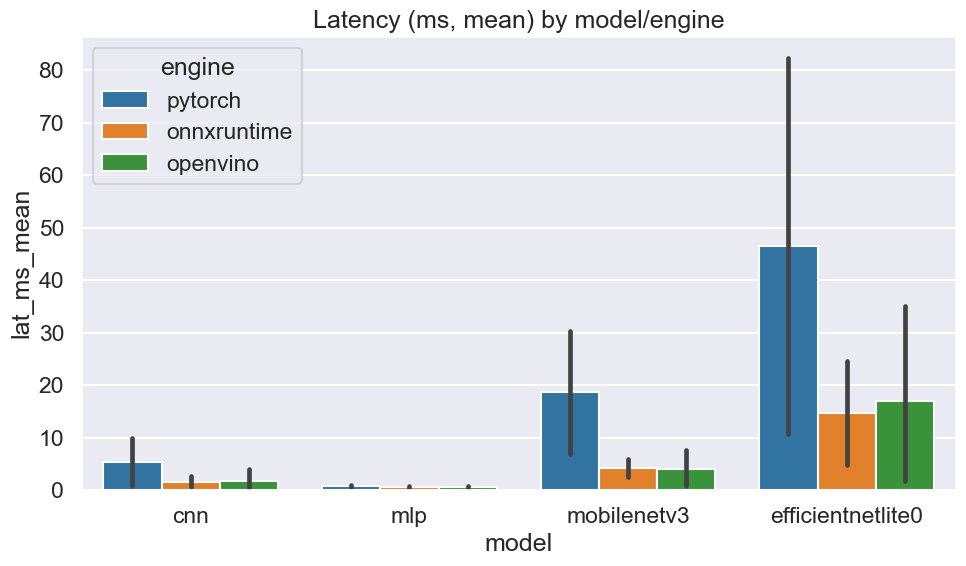

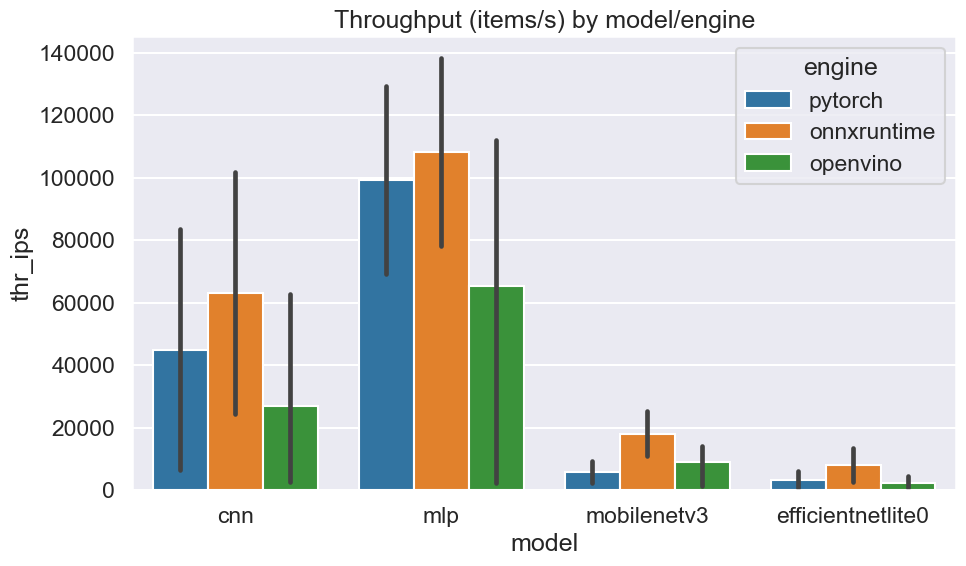

In [12]:
# Example plots: latency and throughput
if not df_infer.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(df_infer, x='model', y='lat_ms_mean', hue='engine')
    plt.title('Latency (ms, mean) by model/engine')
    plt.tight_layout();
    plt.savefig(figs / 'latency_by_engine.png', dpi=150);
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.barplot(df_infer, x='model', y='thr_ips', hue='engine')
    plt.title('Throughput (items/s) by model/engine')
    plt.tight_layout();
    plt.savefig(figs / 'throughput_by_engine.png', dpi=150);
    plt.show()
else:
    print('No inference CSV found for plots.')

## Energy and trade-offs

[NOTE] Provide any missing device power data if available so we can enrich these plots.
We'll add Pareto trade-off charts (latency vs energy) in a future update.

## Plots: training curves and energy summaries

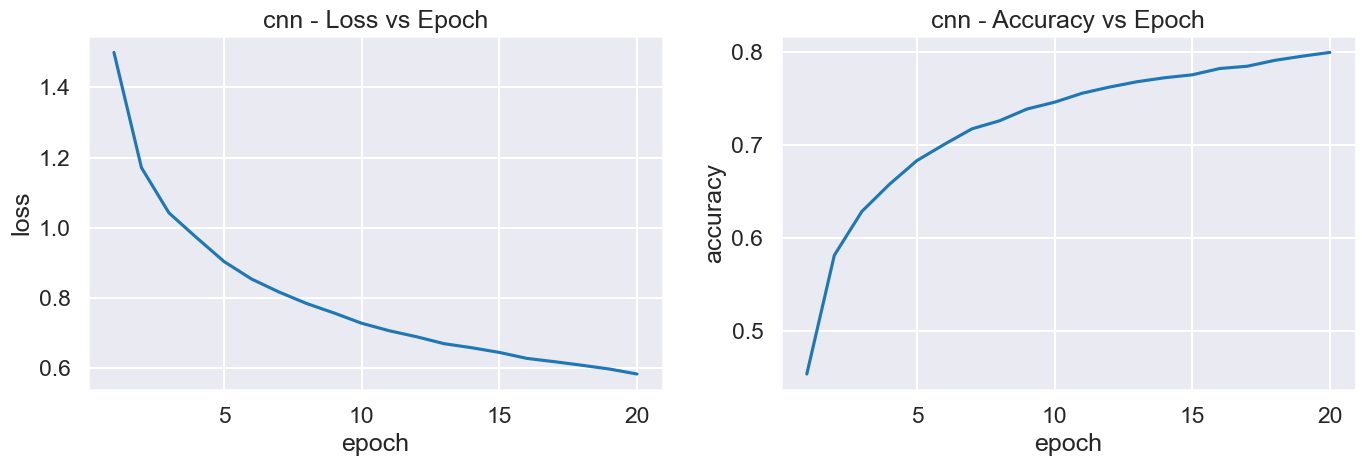

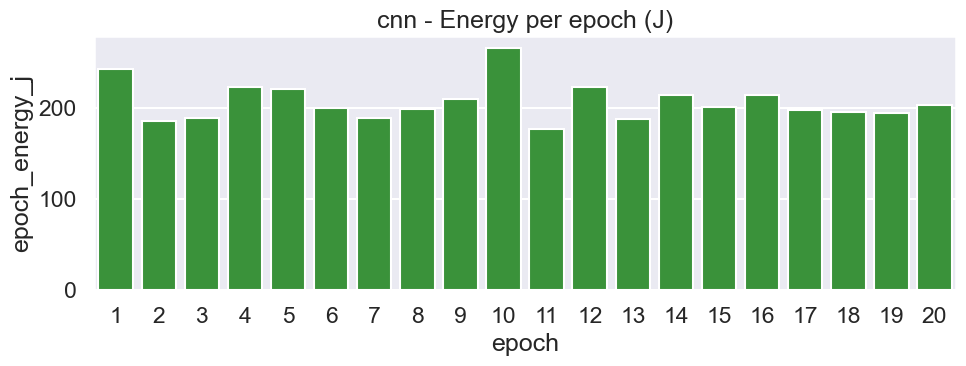

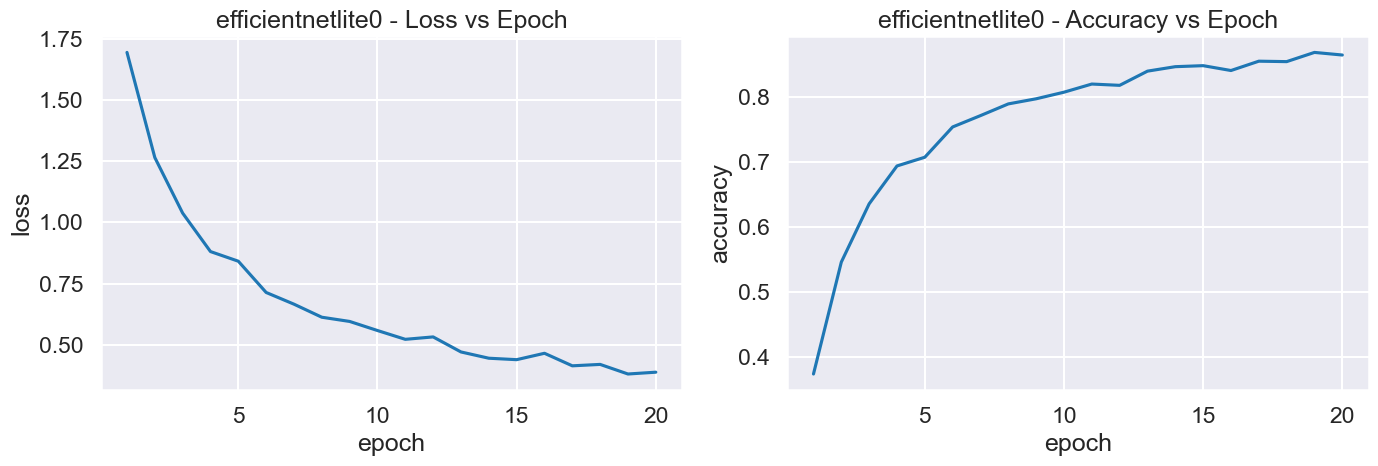

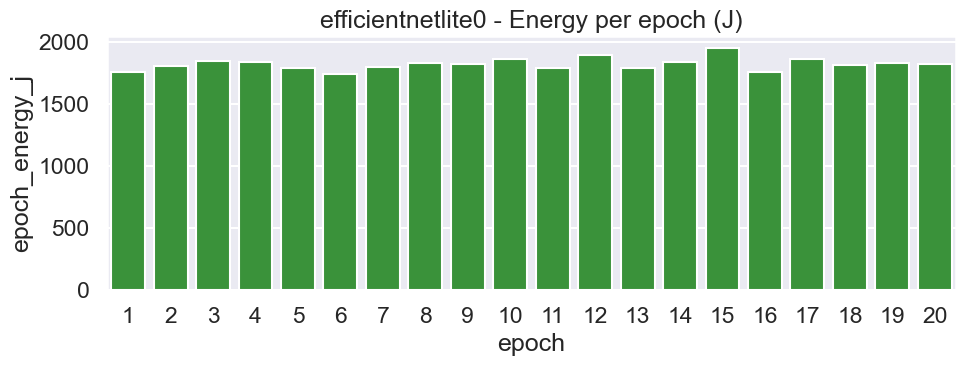

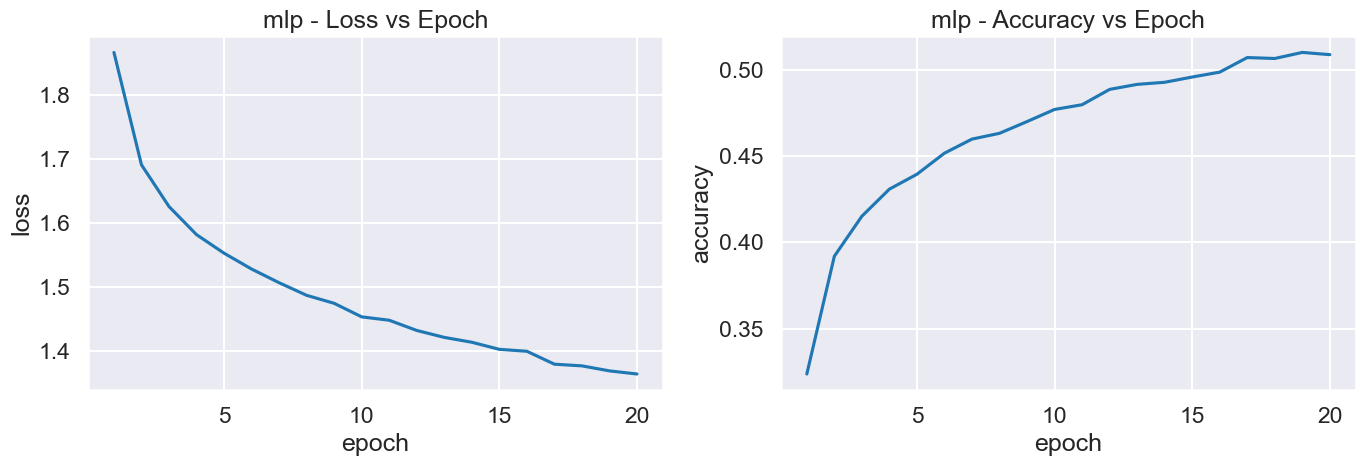

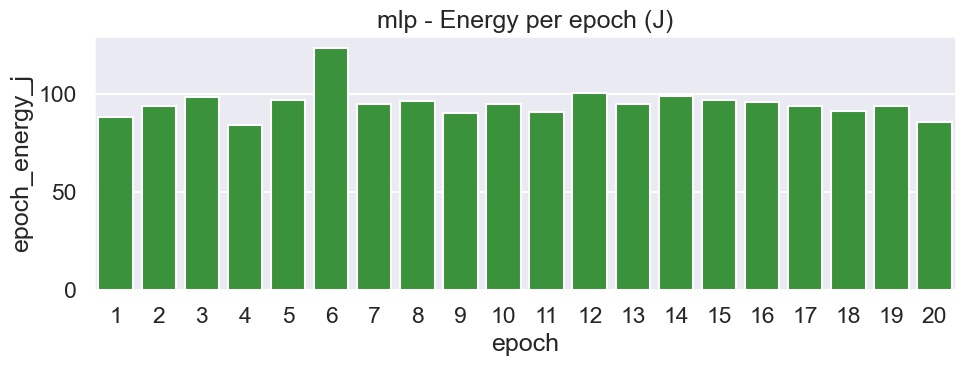

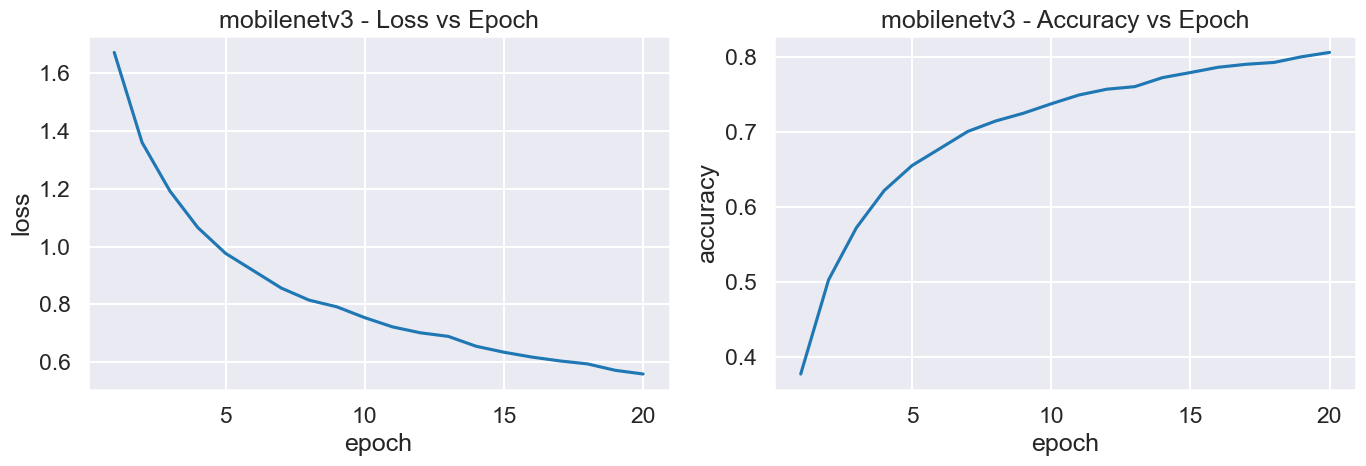

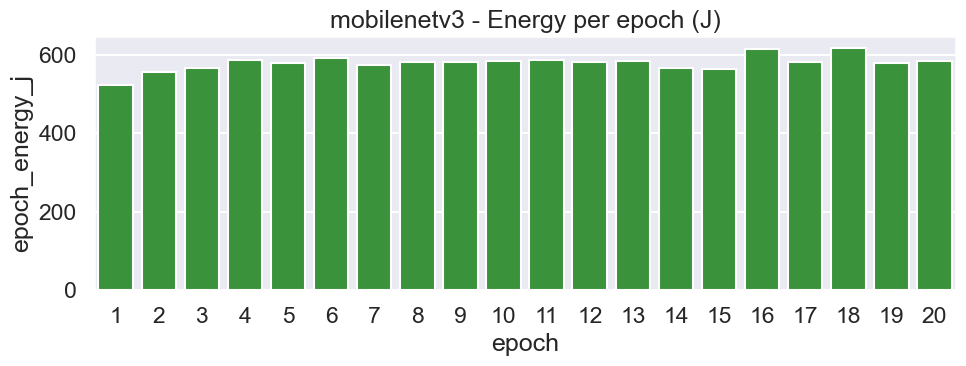

In [13]:
# Plot loss/accuracy vs epoch (per model) with optional energy-per-epoch bars
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics_dir = root / 'metrics'
train_hist_files = sorted(metrics_dir.glob('*_train_history.csv'))
if not train_hist_files:
    print('No train history CSVs found in metrics/.')
else:
    for f in train_hist_files:
        model = f.stem.replace('_train_history', '')
        dfh = pd.read_csv(f)
        if dfh.empty:
            continue
        # Loss/Acc shared x (epoch), dual chart
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        sns.lineplot(dfh, x='epoch', y='loss', ax=ax[0])
        ax[0].set_title(f'{model} - Loss vs Epoch')
        sns.lineplot(dfh, x='epoch', y='accuracy', ax=ax[1])
        ax[1].set_title(f'{model} - Accuracy vs Epoch')
        fig.tight_layout()
        fig.savefig(figs / f'{model}_train_curves.png', dpi=150)
        plt.show()
        # Energy-per-epoch bars (if present)
        if 'epoch_energy_j' in dfh.columns:
            plt.figure(figsize=(10, 4))
            sns.barplot(dfh, x='epoch', y='epoch_energy_j', color='tab:green')
            plt.title(f'{model} - Energy per epoch (J)')
            plt.tight_layout()
            plt.savefig(figs / f'{model}_energy_per_epoch.png', dpi=150)
            plt.show()

## Combined comparison: Loss and Accuracy per model

Two subplots are shown: left (Loss vs Epoch) and right (Accuracy vs Epoch), overlaying the curves of all four models. Below, a bar for each model with the total training energy consumption (sum of energy per epoch) if available in the CSVs.


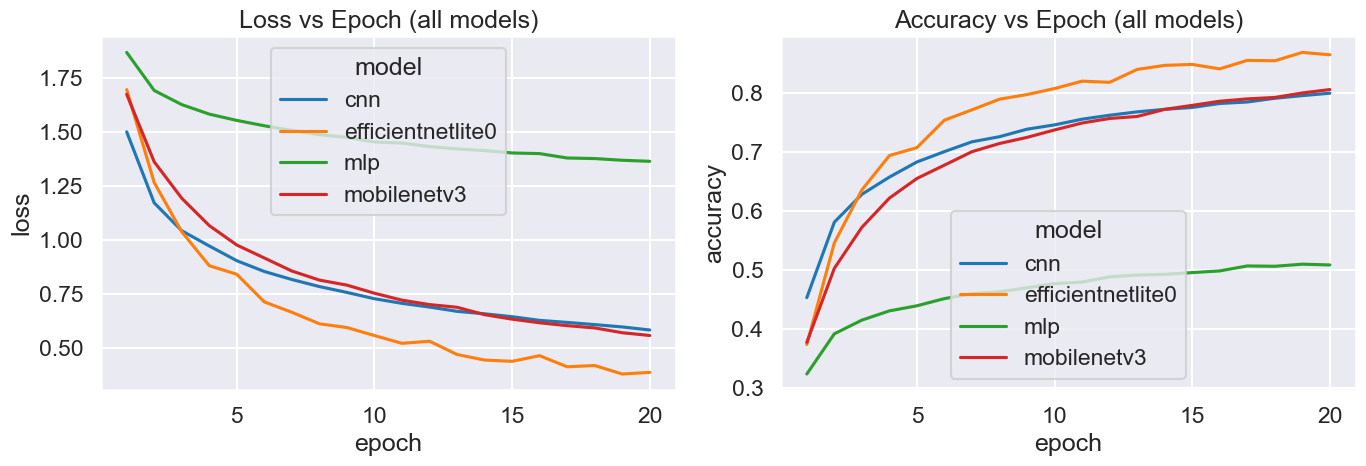

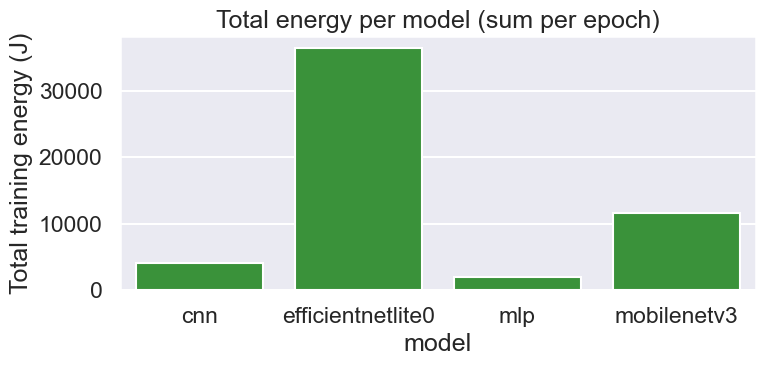

In [14]:
# Combined Loss/Accuracy across models + total training energy per model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics_dir = root / 'metrics'
train_hist_files = sorted(metrics_dir.glob('*_train_history.csv'))

# Load all histories with a model column
dfs = []
for f in train_hist_files:
    try:
        dfh = pd.read_csv(f)
        if dfh.empty or 'epoch' not in dfh.columns:
            continue
        model = f.stem.replace('_train_history', '')
        dfh['model'] = model
        dfs.append(dfh)
    except Exception:
        pass

if not dfs:
    print('No train history CSVs found in metrics/.')
else:
    dfa = pd.concat(dfs, ignore_index=True)
    # Plot combined curves
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.lineplot(dfa, x='epoch', y='loss', hue='model', ax=ax[0])
    ax[0].set_title('Loss vs Epoch (all models)')
    sns.lineplot(dfa, x='epoch', y='accuracy', hue='model', ax=ax[1])
    ax[1].set_title('Accuracy vs Epoch (all models)')
    fig.tight_layout()
    fig.savefig(figs / 'combined_train_curves.png', dpi=150)
    plt.show()

    # Total energy per model (sum of epoch_energy_j when present)
    if 'epoch_energy_j' in dfa.columns:
        energy_tot = (dfa.dropna(subset=['epoch_energy_j'])
                      .groupby('model')['epoch_energy_j']
                      .sum()
                      .reset_index())
        if not energy_tot.empty:
            plt.figure(figsize=(8, 4))
            sns.barplot(energy_tot, x='model', y='epoch_energy_j', color='tab:green')
            plt.ylabel('Total training energy (J)')
            plt.title('Total energy per model (sum per epoch)')
            plt.tight_layout()
            plt.savefig(figs / 'total_train_energy_by_model.png', dpi=150)
            plt.show()
        else:
            print('No energy per epoch data available to calculate sums.')
    else:
        print('No epoch_energy_j column; total energy bar not generated.')


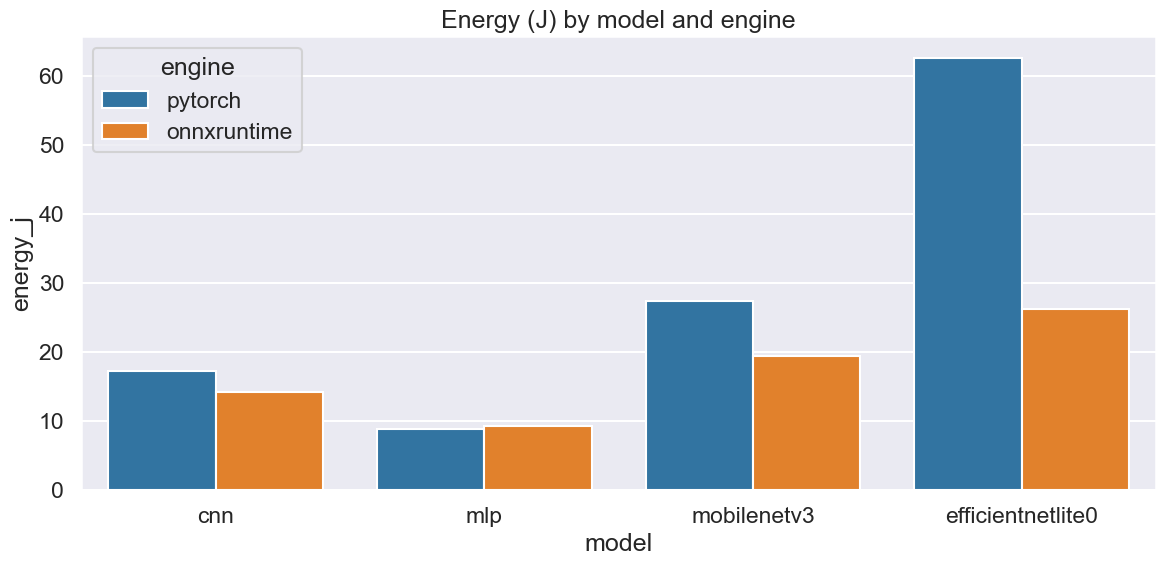

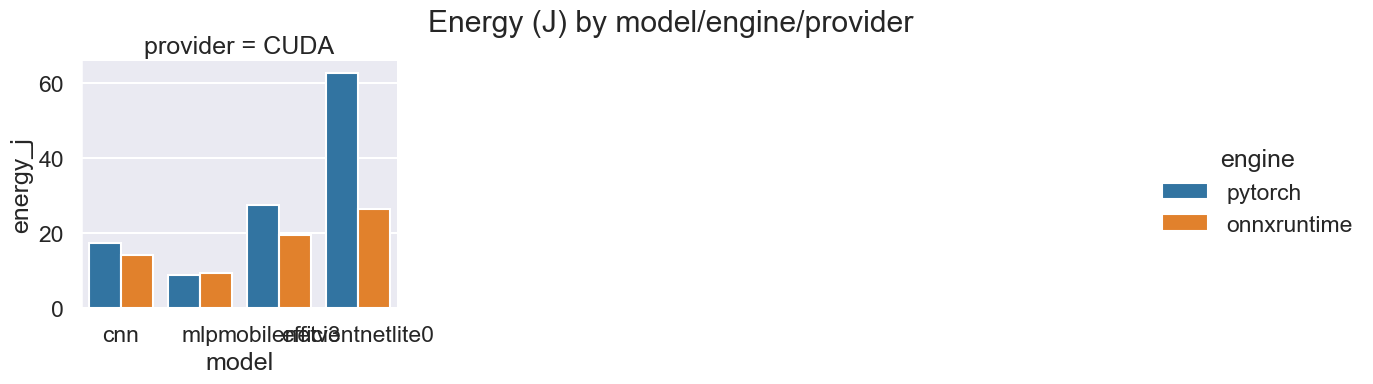

In [15]:
# Energy vs engine/provider
energy_csv = root / 'metrics' / 'inference_energy_summary.csv'
try:
    if energy_csv.exists():
        dfe = pd.read_csv(energy_csv)
    else:
        # derive quickly from df_infer if energy column exists
        if 'df_infer' in globals() and not df_infer.empty:
            dfe = df_infer[df_infer['energy_j'].astype(str) != 'N/D'][
                ['model', 'engine', 'provider', 'energy_j']].copy()
        else:
            dfe = pd.DataFrame()
    if dfe.empty:
        print('No energy data available for plots.')
    else:
        plt.figure(figsize=(12, 6))
        sns.barplot(dfe, x='model', y='energy_j', hue='engine')
        plt.title('Energy (J) by model and engine')
        plt.tight_layout()
        plt.savefig(figs / 'energy_by_engine.png', dpi=150)
        plt.show()
        # Facet by provider for extra granularity
        g = sns.catplot(dfe, x='model', y='energy_j', hue='engine', col='provider', kind='bar', col_wrap=3, height=4)
        g.fig.subplots_adjust(top=0.85)
        g.fig.suptitle('Energy (J) by model/engine/provider')
        g.savefig(figs / 'energy_by_engine_provider.png', dpi=150)
        plt.show()
except Exception as ex:
    print(f'Energy plots failed: {ex}')

## Advanced performance–energy analysis

We add derived metrics and multi-faceted plots that are common in academic evaluations:
- Energy per inference (EPI) and items per joule (IPJ)
- Average power vs throughput (efficiency map)
- Latency vs energy Pareto fronts
- Energy–Delay Product (EDP) and Energy–Delay^2 Product (ED2P)
- Speedups vs PyTorch CPU (baseline) for latency and throughput

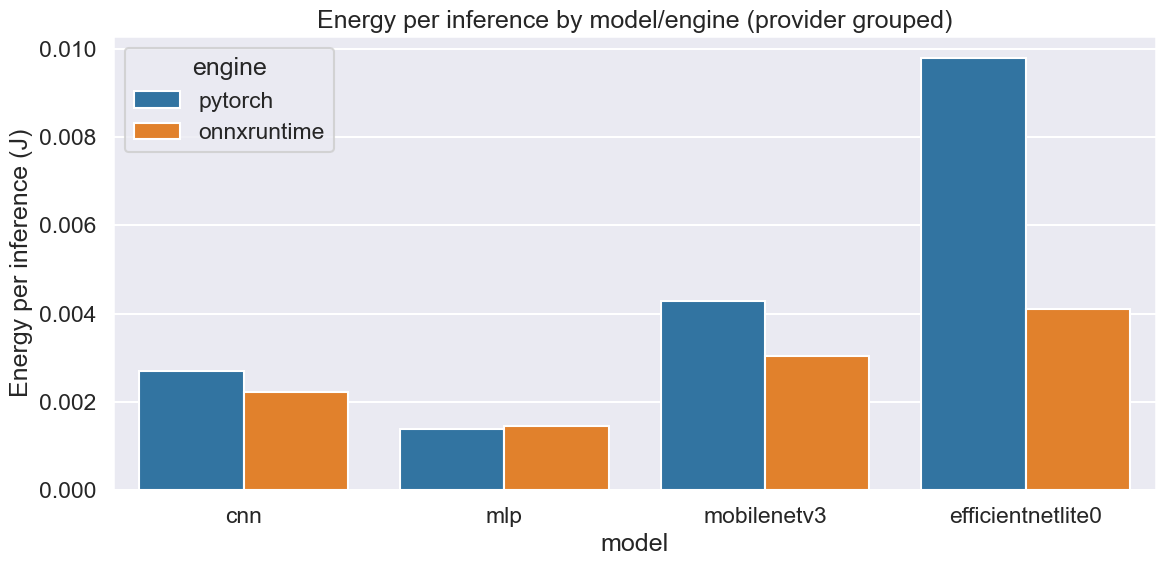

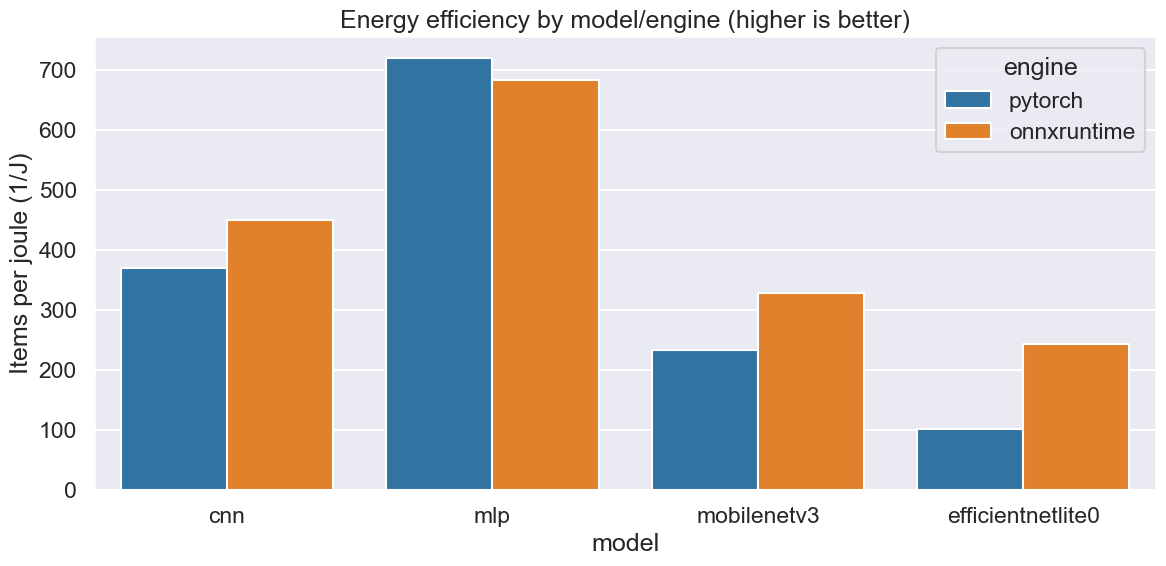

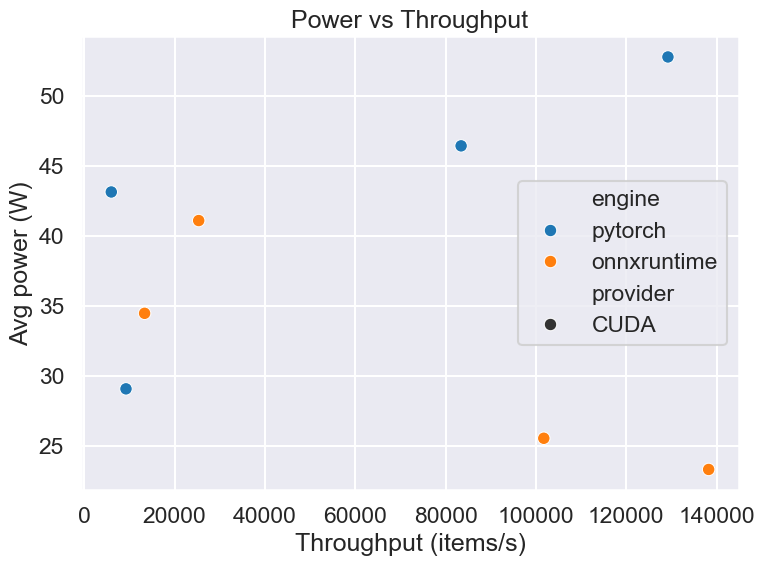

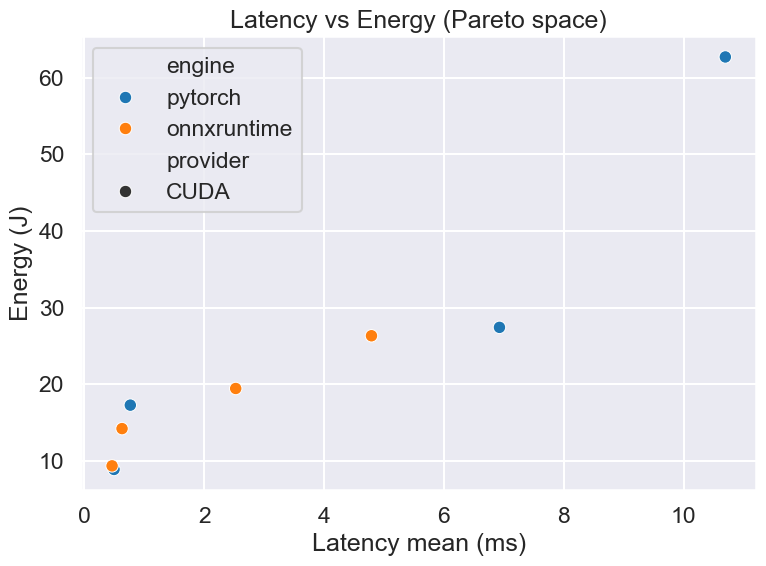

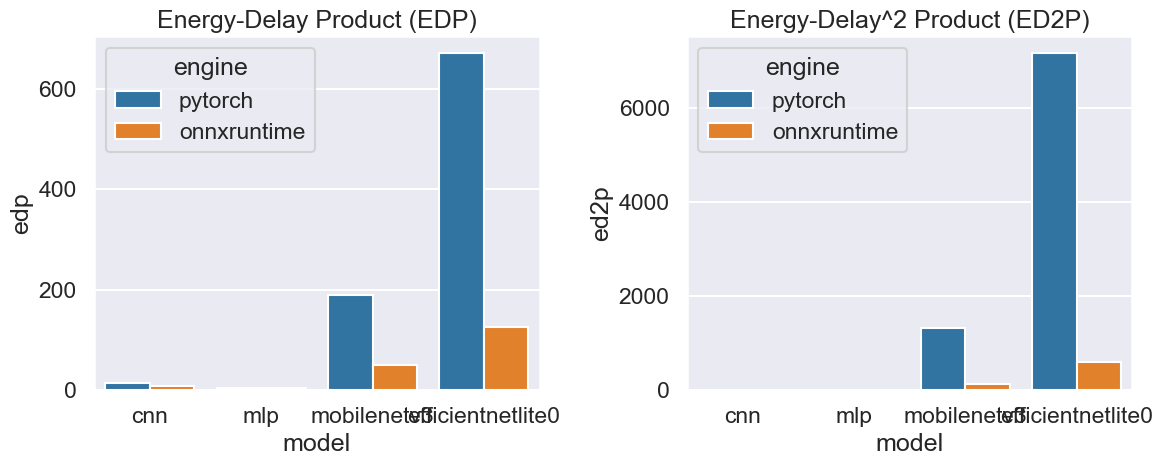

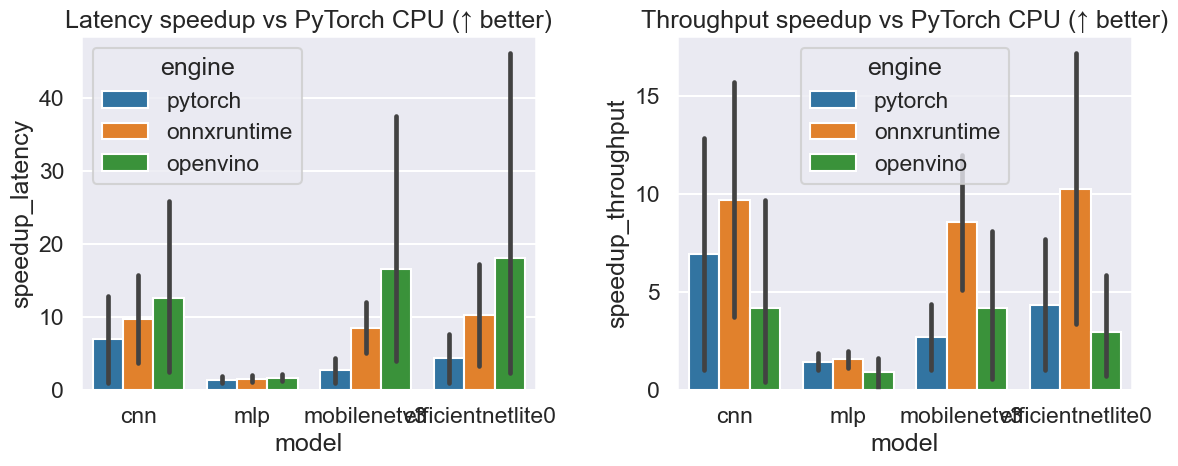

In [16]:
# Derived metrics and advanced plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

infer_csv = root / cfg['outputs']['infer_csv']
energy_csv = root / 'metrics' / 'inference_energy_summary.csv'
if not infer_csv.exists():
    print('No inference CSV found; skip advanced analysis.')
else:
    dfi = pd.read_csv(infer_csv)
    # Merge with energy details when available
    if energy_csv.exists():
        dfe = pd.read_csv(energy_csv)
        keys = ['model', 'engine', 'provider', 'batch', 'runs', 'device_name', 'gpu_name', 'cpu_name', 'os']
        common = [k for k in keys if k in dfi.columns and k in dfe.columns]
        df = pd.merge(dfi, dfe, on=common, how='left', suffixes=('', '_e'))
        # Prefer energy columns from energy CSV (contains dt_ms, avg_power_w)
        if 'energy_j_e' in df.columns:
            df['energy_j'] = df['energy_j_e'].combine_first(df['energy_j'])
        if 'dt_ms' not in df.columns and 'dt_ms_e' in df.columns:
            df['dt_ms'] = df['dt_ms_e']
        if 'avg_power_w' not in df.columns and 'avg_power_w_e' in df.columns:
            df['avg_power_w'] = df['avg_power_w_e']
    else:
        df = dfi.copy()


    # Keep only rows with numeric energy for energy-based plots
    def _to_num(x):
        try:
            return float(x)
        except Exception:
            return np.nan


    df['energy_j_num'] = df['energy_j'].apply(_to_num)
    energy_mask = df['energy_j_num'].notna()

    # Derived metrics
    df['epi_j_per_item'] = np.where(energy_mask & (df['runs'] > 0) & (df['batch'] > 0),
                                    df['energy_j_num'] / (df['runs'] * df['batch']), np.nan)
    df['ipj_items_per_j'] = np.where(df['epi_j_per_item'] > 0, 1.0 / df['epi_j_per_item'], np.nan)
    df['edp'] = df['energy_j_num'] * df['lat_ms_mean']
    df['ed2p'] = df['energy_j_num'] * (df['lat_ms_mean'] ** 2)
    # avg_power_w: if missing, estimate with energy_j/dt
    if 'avg_power_w' not in df.columns:
        df['avg_power_w'] = np.where(energy_mask & (df.get('dt_ms', np.nan) > 0),
                                     df['energy_j_num'] / (df['dt_ms'] / 1000.0), np.nan)

    # 1) Energy per inference (lower is better)
    dfe1 = df[energy_mask].copy()
    if not dfe1.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=dfe1, x='model', y='epi_j_per_item', hue='engine')
        plt.ylabel('Energy per inference (J)')
        plt.title('Energy per inference by model/engine (provider grouped)')
        plt.tight_layout();
        plt.savefig(figs / 'energy_per_inference.png', dpi=150);
        plt.show()

    # 2) Items per joule (higher is better)
    if not dfe1.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=dfe1, x='model', y='ipj_items_per_j', hue='engine')
        plt.ylabel('Items per joule (1/J)')
        plt.title('Energy efficiency by model/engine (higher is better)')
        plt.tight_layout();
        plt.savefig(figs / 'items_per_joule.png', dpi=150);
        plt.show()

    # 3) Average power vs throughput
    dfp = df[energy_mask & df['thr_ips'].notna()].copy()
    if not dfp.empty:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=dfp, x='thr_ips', y='avg_power_w', hue='engine', style='provider')
        plt.xlabel('Throughput (items/s)')
        plt.ylabel('Avg power (W)')
        plt.title('Power vs Throughput')
        plt.tight_layout();
        plt.savefig(figs / 'power_vs_throughput.png', dpi=150);
        plt.show()

    # 4) Pareto: Latency vs Energy
    dfl = df[energy_mask & df['lat_ms_mean'].notna()].copy()
    if not dfl.empty:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=dfl, x='lat_ms_mean', y='energy_j_num', hue='engine', style='provider')
        plt.xlabel('Latency mean (ms)')
        plt.ylabel('Energy (J)')
        plt.title('Latency vs Energy (Pareto space)')
        plt.tight_layout();
        plt.savefig(figs / 'latency_vs_energy.png', dpi=150);
        plt.show()

    # 5) EDP and ED2P (lower is better)
    dfx = dfl.copy()
    if not dfx.empty:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.barplot(data=dfx, x='model', y='edp', hue='engine')
        plt.title('Energy-Delay Product (EDP)')
        plt.subplot(1, 2, 2)
        sns.barplot(data=dfx, x='model', y='ed2p', hue='engine')
        plt.title('Energy-Delay^2 Product (ED2P)')
        plt.tight_layout();
        plt.savefig(figs / 'edp_ed2p.png', dpi=150);
        plt.show()

    # 6) Speedups vs baseline (PyTorch CPU per model)
    base = df[(df['engine'] == 'pytorch') & (df['provider'].str.upper() == 'CPU')]
    if not base.empty:
        base_lat = base[['model', 'lat_ms_mean']].rename(columns={'lat_ms_mean': 'lat_base'})
        base_thr = base[['model', 'thr_ips']].rename(columns={'thr_ips': 'thr_base'})
        dfr = df.merge(base_lat, on='model', how='left').merge(base_thr, on='model', how='left')
        dfr = dfr[dfr['lat_base'].notna() & dfr['thr_base'].notna()].copy()
        dfr['speedup_latency'] = dfr['lat_base'] / dfr['lat_ms_mean']
        dfr['speedup_throughput'] = dfr['thr_ips'] / dfr['thr_base']
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.barplot(data=dfr, x='model', y='speedup_latency', hue='engine')
        plt.title('Latency speedup vs PyTorch CPU (↑ better)')
        plt.subplot(1, 2, 2)
        sns.barplot(data=dfr, x='model', y='speedup_throughput', hue='engine')
        plt.title('Throughput speedup vs PyTorch CPU (↑ better)')
        plt.tight_layout();
        plt.savefig(figs / 'speedups_vs_pytorch_cpu.png', dpi=150);
        plt.show()

    # 7) Boxplots for variability (if multiple runs per combination)
    if df.groupby(['model', 'engine', 'provider']).size().max() > 1:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='engine', y='lat_ms_mean', hue='model')
        plt.title('Latency distribution by engine/model')
        plt.tight_layout();
        plt.savefig(figs / 'latency_boxplot.png', dpi=150);
        plt.show()

## Federated results (Notebook 03)

This section loads metrics from `metrics/03_flower_rounds.csv` and generates scenario comparisons.

- CPU vs GPU vs NPU (latency and throughput, from OpenVINO post-fit metrics)
- Global accuracy/loss evolution per scenario
- Accumulated training energy by scenario and device
- Training time comparison (t_train_s) between IID and Non-IID

In [17]:
# Load federated simulation CSV
import os
import pandas as pd
from pathlib import Path

CSV = str(Path('..').resolve().joinpath('metrics', '03_flower_rounds.csv'))
if not os.path.exists(CSV):
    raise FileNotFoundError(f'Missing {CSV}. Please run notebook 03 first.')

raw = pd.read_csv(CSV)
# Normalize and cast numeric columns (ignore missing)
for col in ['round', 't_train_s', 't_eval_s', 't_agg_s', 'acc', 'loss', 'energy_j', 'bytes_up', 'bytes_down',
            'params_bytes',
            'ov_cpu_lat_ms', 'ov_gpu_lat_ms', 'ov_npu_lat_ms', 'ov_cpu_thr_ips', 'ov_gpu_thr_ips', 'ov_npu_thr_ips']:
    if col in raw.columns:
        raw[col] = pd.to_numeric(raw[col], errors='coerce')

# Backward-compatibility with earlier schemas
if 'device_tag' not in raw.columns and 'device' in raw.columns:
    raw['device_tag'] = raw['device']

raw.head()

,timestamp,scenario,round,role,cid,device,t_train_s,t_eval_s,t_agg_s,params_bytes,...,ov_gpu_lat_ms,ov_gpu_thr_ips,ov_npu_lat_ms,ov_npu_thr_ips,torch,flwr,openvino,os,hostname,device_tag
0,2025-08-15T14:12:44.952672,unknown,0,server,-,cpu,0.000000,0.000000,0.0,376488,...,-1.0,-1.0,-1.0,-1.0,2.8.0+cu129,1.20.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,Windows-10-10.0.26100-SP0,MSIdeJosePadial,cpu
1,2025-08-15T14:13:34.225062,A,0,client,3,cpu,30.500085,17.931266,-1.0,376488,...,-1.0,-1.0,-1.0,-1.0,2.8.0+cu129,1.20.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,Windows-10-10.0.26100-SP0,MSIdeJosePadial,cpu
2,2025-08-15T14:13:37.353973,A,0,client,1,cpu,29.803939,17.571870,-1.0,376488,...,-1.0,-1.0,-1.0,-1.0,2.8.0+cu129,1.20.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,Windows-10-10.0.26100-SP0,MSIdeJosePadial,cpu
3,2025-08-15T14:13:38.888442,A,0,client,0,cpu,30.182808,17.781224,-1.0,376488,...,-1.0,-1.0,-1.0,-1.0,2.8.0+cu129,1.20.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,Windows-10-10.0.26100-SP0,MSIdeJosePadial,cpu
4,2025-08-15T14:13:39.004973,A,0,client,2,cpu,29.220233,17.926943,-1.0,376488,...,-1.0,-1.0,-1.0,-1.0,2.8.0+cu129,1.20.0,2025.2.0-19140-c01cd93e24d-releases/2025/2,Windows-10-10.0.26100-SP0,MSIdeJosePadial,cpu


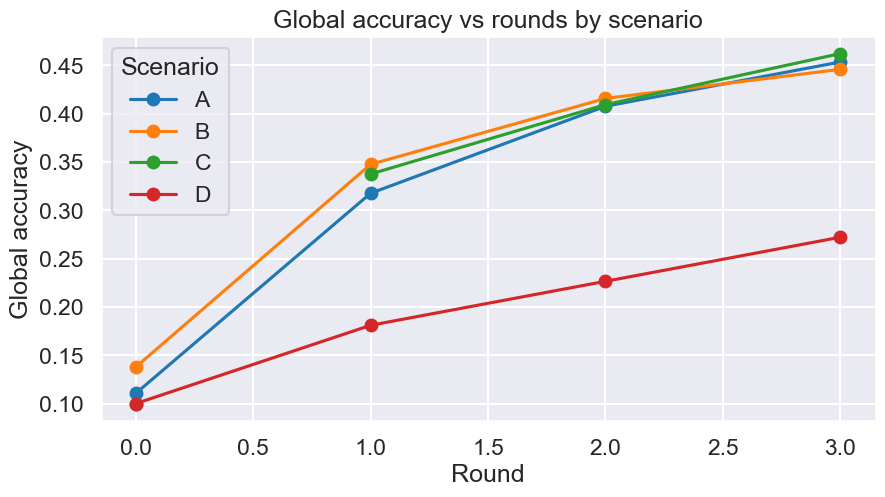

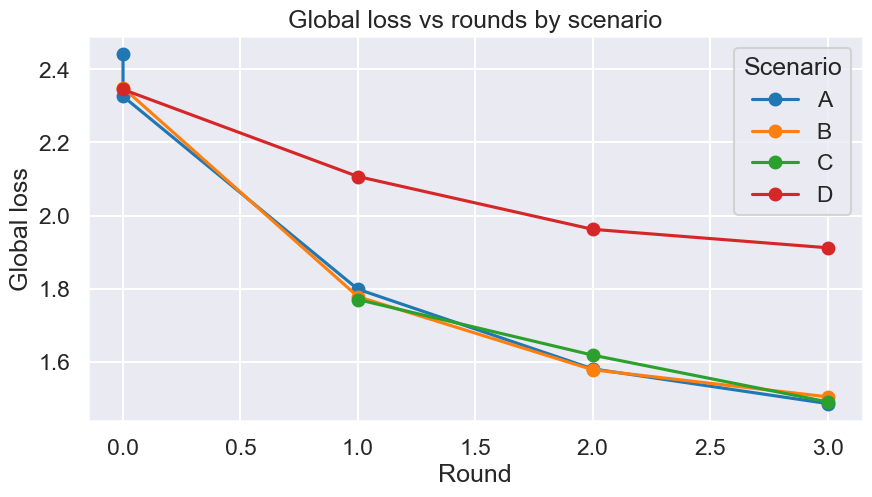

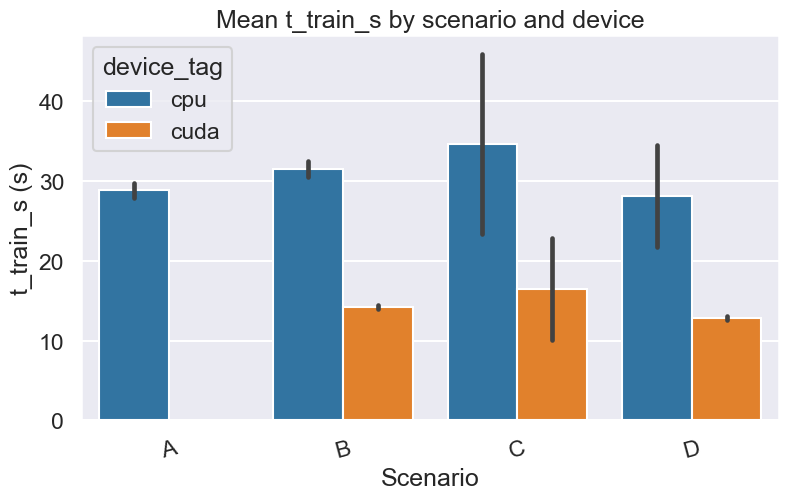

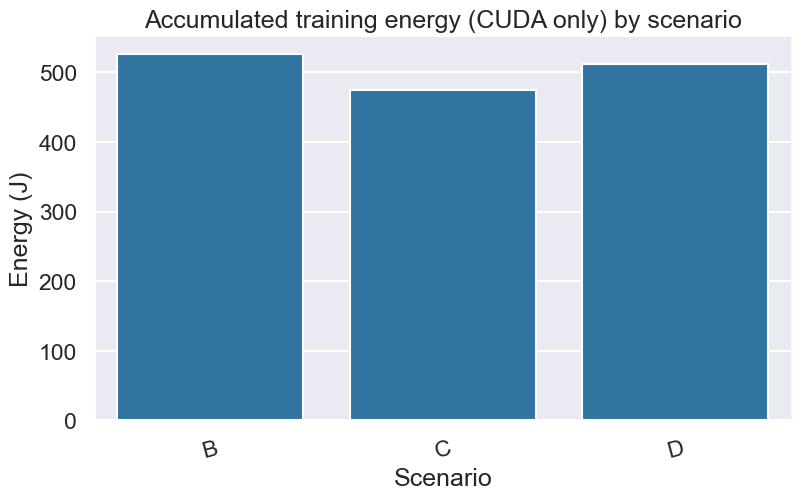

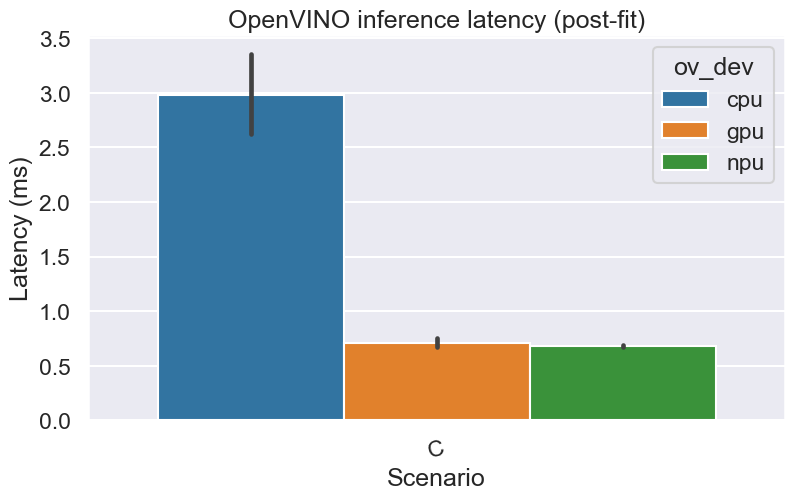

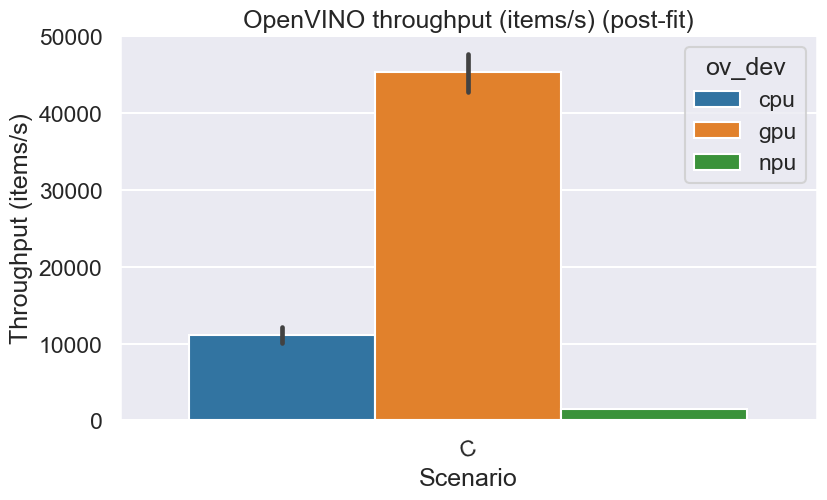

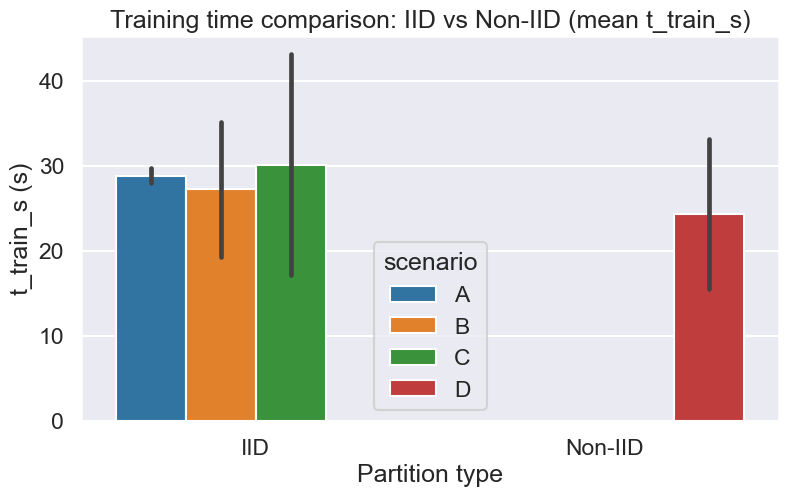

In [24]:
# Federated scenario plots (refined)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamps are datetimes for nearest-scenario backfill
if 'timestamp' in raw.columns:
    raw['timestamp'] = pd.to_datetime(raw['timestamp'], errors='coerce')

# Split server/clients
server = raw[raw['role'] == 'server'].copy() if 'role' in raw.columns else raw.copy()
clients = raw[raw['role'] == 'client'].copy() if 'role' in raw.columns else raw.copy()

# Backfill missing/unknown scenario in server rows using nearest client timestamp
if not server.empty and 'scenario' in server.columns and 'timestamp' in server.columns and 'timestamp' in clients.columns:
    unknown_mask = server['scenario'].isna() | server['scenario'].astype(str).str.strip().eq('') | server[
        'scenario'].astype(str).str.lower().eq('unknown')
    if unknown_mask.any():
        sv = server.loc[unknown_mask, ['timestamp']].copy().rename(columns={'timestamp': 'ts'})
        cv = clients[['timestamp', 'scenario']].dropna(subset=['timestamp']).copy().rename(columns={'timestamp': 'ts'})
        sv = sv.sort_values('ts')
        cv = cv.sort_values('ts')
        if not cv.empty:
            nearest = pd.merge_asof(sv, cv, on='ts', direction='nearest')
            server.loc[unknown_mask, 'scenario'] = nearest['scenario'].values

# 1) Global accuracy and loss vs rounds per scenario (role=server)
plt.figure(figsize=(10, 5))
if not server.empty:
    plotted = False
    for scen, df in server.groupby('scenario'):
        if pd.isna(scen) or str(scen).strip().lower() == 'unknown':
            continue
        df = df.sort_values('round')
        if 'acc' in df.columns and df['acc'].notna().any():
            plt.plot(df['round'], df['acc'], marker='o', label=str(scen))
            plotted = True
    if plotted:
        plt.xlabel('Round')
        plt.ylabel('Global accuracy')
        plt.title('Global accuracy vs rounds by scenario')
        plt.legend(title='Scenario');
        plt.grid(True)
        plt.show()
    else:
        plt.close();
        print('No accuracy data to plot for server rows.')
else:
    print('No server rows found in CSV.')

# Also plot loss if available
if not server.empty and 'loss' in server.columns:
    plt.figure(figsize=(10, 5))
    plotted = False
    for scen, df in server.groupby('scenario'):
        if pd.isna(scen) or str(scen).strip().lower() == 'unknown':
            continue
        df = df.sort_values('round')
        if df['loss'].notna().any():
            plt.plot(df['round'], df['loss'], marker='o', label=str(scen))
            plotted = True
    if plotted:
        plt.xlabel('Round')
        plt.ylabel('Global loss')
        plt.title('Global loss vs rounds by scenario')
        plt.legend(title='Scenario');
        plt.grid(True)
        plt.show()
    else:
        plt.close();
        print('No loss data to plot for server rows.')

# 2) Mean t_train_s by scenario and device (clients)
clients['t_train_s'] = pd.to_numeric(clients.get('t_train_s'), errors='coerce')
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(data=clients, x='scenario', y='t_train_s', hue='device_tag', estimator=np.mean, errorbar='sd', ax=ax)
ax.set_title('Mean t_train_s by scenario and device')
ax.set_ylabel('t_train_s (s)');
ax.set_xlabel('Scenario');
ax.grid(True, axis='y')
plt.xticks(rotation=15)
plt.show()

# 3) Accumulated training energy: default CUDA-only; switch to per-device only if
# there are positive energy readings from multiple devices
clients['energy_j_num'] = pd.to_numeric(clients.get('energy_j'), errors='coerce')
energy_rows = clients[clients['energy_j_num'] > 0].copy()
if energy_rows.empty:
    print('No positive energy data available for accumulation plot.')
else:
    energy_rows['device_kind'] = energy_rows.get('device_tag', '').astype(str).str.lower()
    # Count devices with positive energy totals
    pos_dev_totals = energy_rows.groupby('device_kind')['energy_j_num'].sum()
    positive_device_count = (pos_dev_totals[pos_dev_totals > 0].index.size)
    fig, ax = plt.subplots(figsize=(9, 5))
    if positive_device_count and positive_device_count > 1:
        acc_energy = (energy_rows.groupby(['scenario', 'device_kind'])['energy_j_num'].sum().reset_index())
        sns.barplot(data=acc_energy, x='scenario', y='energy_j_num', hue='device_kind', ax=ax)
        ax.set_title('Accumulated training energy by scenario and device (positive only)')
    else:
        # Default to CUDA-only view (fallback to whatever device exists if CUDA missing)
        cuda_only = energy_rows[energy_rows['device_kind'] == 'cuda']
        if cuda_only.empty:
            cuda_only = energy_rows
        acc_energy = cuda_only.groupby('scenario')['energy_j_num'].sum().reset_index()
        sns.barplot(data=acc_energy, x='scenario', y='energy_j_num', ax=ax, color='tab:blue')
        ax.set_title('Accumulated training energy (CUDA only) by scenario')
    ax.set_ylabel('Energy (J)');
    ax.set_xlabel('Scenario');
    ax.grid(True, axis='y')
    plt.xticks(rotation=15)
    plt.show()

# 4) OpenVINO latency by device (CPU/GPU/NPU) — filter to positive values only
lat_cols = ['ov_cpu_lat_ms', 'ov_gpu_lat_ms', 'ov_npu_lat_ms']
flat = clients.copy()
for c in lat_cols:
    if c in flat.columns:
        flat[c] = pd.to_numeric(flat[c], errors='coerce')
lat_melt = flat.melt(id_vars=['scenario'], value_vars=[c for c in lat_cols if c in flat.columns], var_name='ov_dev',
                     value_name='lat_ms').dropna()
if not lat_melt.empty:
    lat_melt = lat_melt[lat_melt['lat_ms'] > 0]
    if not lat_melt.empty:
        lat_melt['ov_dev'] = lat_melt['ov_dev'].str.replace('ov_', '').str.replace('_lat_ms', '')
        plt.figure(figsize=(9, 5))
        sns.barplot(data=lat_melt, x='scenario', y='lat_ms', hue='ov_dev')
        plt.title('OpenVINO inference latency (post-fit)')
        plt.ylabel('Latency (ms)');
        plt.xlabel('Scenario');
        plt.grid(True, axis='y')
        plt.xticks(rotation=15)
        plt.show()

# 5) OpenVINO throughput by device (CPU/GPU/NPU) — filter to positive values only
thr_cols = ['ov_cpu_thr_ips', 'ov_gpu_thr_ips', 'ov_npu_thr_ips']
flat_thr = clients.copy()
for c in thr_cols:
    if c in flat_thr.columns:
        flat_thr[c] = pd.to_numeric(flat_thr[c], errors='coerce')
thr_melt = flat_thr.melt(id_vars=['scenario'], value_vars=[c for c in thr_cols if c in flat_thr.columns],
                         var_name='ov_dev', value_name='thr_ips').dropna()
if not thr_melt.empty:
    thr_melt = thr_melt[thr_melt['thr_ips'] > 0]
    if not thr_melt.empty:
        thr_melt['ov_dev'] = thr_melt['ov_dev'].str.replace('ov_', '').str.replace('_thr_ips', '')
        plt.figure(figsize=(9, 5))
        sns.barplot(data=thr_melt, x='scenario', y='thr_ips', hue='ov_dev')
        plt.title('OpenVINO throughput (items/s) (post-fit)')
        plt.ylabel('Throughput (items/s)');
        plt.xlabel('Scenario');
        plt.grid(True, axis='y')
        plt.xticks(rotation=15)
        plt.show()

# 6) IID vs Non-IID: mean t_train_s comparison
clients['scenario_u'] = clients['scenario'].astype(str).str.upper().str.strip()
clients['partition'] = np.where(clients['scenario_u'].isin(['D', 'NONIID', 'NON-IID', 'NON_IID']), 'Non-IID', 'IID')
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(data=clients, x='partition', y='t_train_s', hue='scenario', estimator=np.mean, errorbar='sd', ax=ax)
ax.set_title('Training time comparison: IID vs Non-IID (mean t_train_s)')
ax.set_ylabel('t_train_s (s)');
ax.set_xlabel('Partition type');
ax.grid(True, axis='y')
plt.xticks(rotation=0)
plt.show()